In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend_handler import HandlerLine2D
from IPython.display import display
import sys
import pandas as pd
import seaborn.apionly as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import re
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# Enable inline plotting  
%matplotlib inline

/Users/oliver/anaconda3/envs/pmda/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/oliver/anaconda3/envs/pmda/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/oliver/anaconda3/envs/pmda/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 02:16:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.24.2
Numpy version 1.16.3


In [5]:
data_Bridges_1 = 'dff-comm-updated-rmsd-Bridge4.csv'
data_Bridges_2 = 'dff-comm-updated-rmsd-Bridge1.csv'
data_Bridges_3 = 'dff-comm-updated-rmsd-Bridge2.csv'
data_Bridges_4 = 'dff-comm-updated-rmsd-Bridge3.csv'
data_comet = 'dff-comm-updated-rmsd-parallel-IO-Comet.csv' 
data_SuperMIC = 'dff-comm-updated-rmsd-SuperMIC.csv'

In [6]:
dff_1x_Bridges_1 = pd.read_csv(data_Bridges_1)
dff_1x_Bridges_2 = pd.read_csv(data_Bridges_2)
dff_1x_Bridges_3 = pd.read_csv(data_Bridges_3)
dff_1x_Bridges_4 = pd.read_csv(data_Bridges_4)
dff_1x_comet = pd.read_csv(data_comet)
dff_1x_SuperMIC = pd.read_csv(data_SuperMIC)

/Users/oliver/anaconda3/envs/pmda/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/oliver/anaconda3/envs/pmda/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/oliver/anaconda3/envs/pmda/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


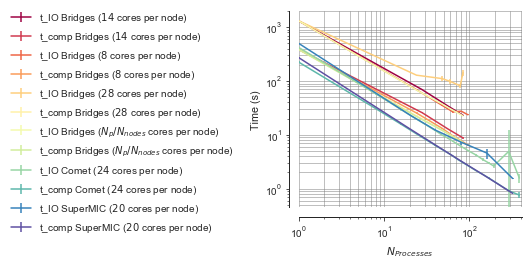

In [7]:
import matplotlib.patches as mpatches
from matplotlib.pyplot import *
import matplotlib

plt.rcParams['font.size'] = 9
fig = plt.figure(figsize=(4,4))
axes = fig.add_subplot(1,1,1)
width = 0.85 
colormap = plt.cm.nipy_spectral 
axes.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,12)))

dff = [dff_1x_Bridges_1, dff_1x_Bridges_2, dff_1x_Bridges_3, dff_1x_Bridges_4, dff_1x_comet, dff_1x_SuperMIC]
labels = ['Bridges ($14$ cores per node)','Bridges ($8$ cores per node)','Bridges ($28$ cores per node)',
          'Bridges ($N_{p}/N_(nodes)$ cores per node)','Comet ($N_{p}/N_(nodes)$)','SuperMIC ($20$ cores per node)$)']

dff[0].index = dff[0].loc[:,'blocks']
dff[1].index = dff[1].loc[:,'blocks']
dff[2].index = dff[2].loc[:,'blocks']
dff[3].index = dff[3].loc[:,'blocks']
dff[4].index = dff[4].loc[:,'blocks']
dff[5].index = dff[5].loc[:,'blocks']

yerrs1 = [dff[0]['std_t_IO'].values.transpose().tolist(),dff[0]['std_t_comp'].values.transpose().tolist()]
dff[0].loc[:,['t_IO','t_comp']].plot(yerr=yerrs1,ax=axes)

yerrs2 = [dff[1]['std_t_IO'].values.transpose().tolist(),dff[1]['std_t_comp'].values.transpose().tolist()]
dff[1].loc[:,['t_IO','t_comp']].plot(yerr=yerrs2,ax=axes)

yerrs3 = [dff[2]['std_t_IO'].values.transpose().tolist(),dff[2]['std_t_comp'].values.transpose().tolist()]
dff[2].loc[:,['t_IO','t_comp']].plot(yerr=yerrs3,ax=axes)

yerrs4 = [dff[3]['std_t_IO'].values.transpose().tolist(),dff[3]['std_t_comp'].values.transpose().tolist()]
dff[3].loc[:,['t_IO','t_comp']].plot(yerr=yerrs4,ax=axes)

yerrs5 = [dff[4]['std_t_IO'].values.transpose().tolist(),dff[4]['std_t_comp'].values.transpose().tolist()]
dff[4].loc[:,['t_IO','t_comp']].plot(yerr=yerrs5,ax=axes)

yerrs5 = [dff[5]['std_t_IO'].values.transpose().tolist(),dff[5]['std_t_comp'].values.transpose().tolist()]
dff[5].loc[:,['t_IO','t_comp']].plot(yerr=yerrs5,ax=axes)

plt.style.use('ggplot')
sns.set_style('ticks')
axes.set_xlabel('$N_{Processes}$')   
axes.set_ylabel('Time (s)')
plt.xscale('log')
plt.yscale('log')

axes.set_ylim(0, 2000)
axes.set_xlim(0, 410)
axes.yaxis.grid(which='major', linewidth='0.5', color='grey')
axes.xaxis.grid(which='major', linewidth='0.5', color='grey')
axes.yaxis.grid(which='minor', linewidth='0.5', color='grey')
axes.xaxis.grid(which='minor', linewidth='0.5', color='grey')  

sns.despine(offset=10, ax=axes)
fig.subplots_adjust(bottom=0.2)
legends = ['t_IO Bridges ($14$ cores per node)','t_comp Bridges ($14$ cores per node)',
           't_IO Bridges ($8$ cores per node)','t_comp Bridges ($8$ cores per node)',
           't_IO Bridges ($28$ cores per node)','t_comp Bridges ($28$ cores per node)',
           't_IO Bridges ($N_{p}/N_{nodes}$ cores per node)','t_comp Bridges ($N_{p}/N_{nodes}$ cores per node)',
           't_IO Comet ($24$ cores per node)','t_comp Comet ($24$ cores per node)',
           't_IO SuperMIC ($20$ cores per node)','t_comp SuperMIC ($20$ cores per node)']

lgd = plt.legend(legends,loc='upper right', bbox_to_anchor=(-0.25, 1.05), frameon=False, shadow=True, ncol=1)
plt.tight_layout()
plt.show()
fig_name = 'Clusters_IO_compute_scaling'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')